#**Import Library**

In [1]:
pip install tensorflow

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [7]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
#base_dir
base_dir = '/content/drive/Shareddrives/Capstone Project/ML/Deteksi Gambar'
#!ls
!ls "/content/drive/Shareddrives/Capstone Project/ML/Deteksi Gambar"

bahan  latih  validasi


In [ ]:
# menentukan directory
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

In [ ]:
# menentukan direktori isi bahan
bodrex_dir = os.path.join(bahan_dir, 'bodrex/')
tolakangin_dir = os.path.join(bahan_dir, 'tolakangin/')

print("jumlah data train tiap kelas")
print('Jumlah gambar obat bodrex :', len(os.listdir(bodrex_dir)))
print('Jumlah gambar obat tolak angin :', len(os.listdir(tolakangin_dir)))


jumlah data train tiap kelas
Jumlah gambar obat bodrex : 130
Jumlah gambar obat tolak angin : 130


In [ ]:
#direktori isi latih
train_bodrex = os.path.join(train_dir, 'bodrex/')
train_tolakangin = os.path.join(train_dir, 'tolakangin/')

#direktori isi validasi
validation_bodrex = os.path.join(validation_dir, 'bodrex/')
validation_tolakangin = os.path.join(validation_dir, 'tolakangin/')

### **Menyiapkan dataset**


In [ ]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int (train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

# pembagian data train dengan validation
train_ratio = 0.9

#pembagian train dan validasi
# training
source_00 = bodrex_dir
train_00 = train_bodrex
val_00 = validation_bodrex
train_val_split(source_00, train_00, val_00, train_ratio)

# validasi
source_01 = tolakangin_dir
train_01 = train_tolakangin
val_01 = validation_tolakangin
train_val_split(source_01, train_01, val_01, train_ratio)

In [ ]:
# misal untuk melihat jumlah pembagian
print('jumlah all bodrex    :', len(os.listdir(bodrex_dir)))
print('jumlah train bodrex  :', len(os.listdir(train_bodrex)))
print('jumlah val bodrex    :', len(os.listdir(validation_bodrex)))

print('jumlah all tolak angin    :', len(os.listdir(tolakangin_dir)))
print('jumlah train tolak angin  :', len(os.listdir(train_tolakangin)))
print('jumlah val tolak angin    :', len(os.listdir(validation_tolakangin)))

jumlah all bodrex    : 130
jumlah train bodrex  : 117
jumlah val bodrex    : 13
jumlah all tolak angin    : 130
jumlah train tolak angin  : 117
jumlah val tolak angin    : 13


#**Load & Preprocess Data**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range =0.1
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range =0.1
)

target

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 234 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.90):
      print("\nAccuraty up to 90%")
      self.model.stop_training = True

callbacks = myCallback()

#**CNN Model**

In [ ]:
model=tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dropout(0.3, seed=112),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dropout(0.5, seed=112),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

#**Compile The Model**

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer =  'Adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 6,
    epochs = 25,
    validation_data = val_generator,
    validation_steps = 1,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/25
6/6 [==============================] - 40s 7s/step - loss: 0.8264 - accuracy: 0.4815 - val_loss: 0.7218 - val_accuracy: 0.4000
Epoch 2/25
6/6 [==============================] - 40s 7s/step - loss: 0.7106 - accuracy: 0.4833 - val_loss: 0.6719 - val_accuracy: 0.5000
Epoch 3/25
6/6 [==============================] - 34s 6s/step - loss: 0.6618 - accuracy: 0.5667 - val_loss: 0.6849 - val_accuracy: 0.4000
Epoch 4/25
6/6 [==============================] - 37s 6s/step - loss: 0.6171 - accuracy: 0.8333 - val_loss: 0.5307 - val_accuracy: 1.0000
Epoch 5/25
6/6 [==============================] - ETA: 0s - loss: 0.3371 - accuracy: 0.9167
Accuraty up to 90%
6/6 [==============================] - 35s 6s/step - loss: 0.3371 - accuracy: 0.9167 - val_loss: 0.0347 - val_accuracy: 1.0000


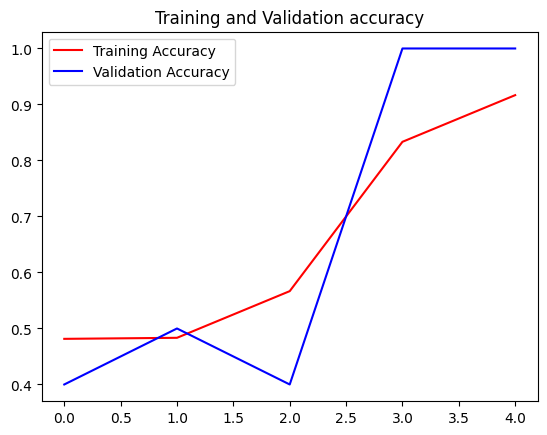

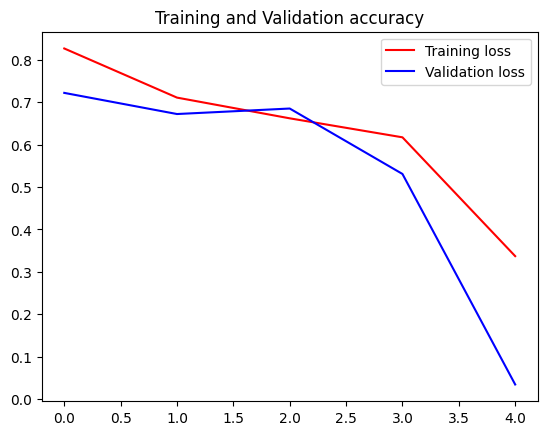

In [ ]:
#tingkat akurasi dan loss

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

#**Train The Model**

Saving IMG_20231203_171433_908.jpg to IMG_20231203_171433_908.jpg
1/1 [==============================] - 0s 29ms/step
IMG_20231203_171433_908.jpg
This image belongs to class tolakangin


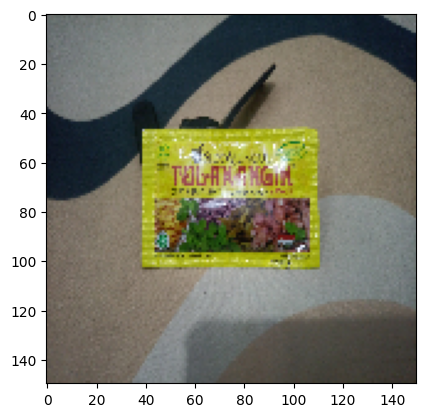

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=100)  # Fix: Use 'images' instead of 'image'

  print(fn)

  class_list = os.listdir(train_dir)

  for j in range(42):
    if classes[0][j] == 1.:
      print('This image belongs to class', class_list[j])
      break


#**Evaluate The Model Using Data Testing**

In [ ]:
# Simpan model ke dalam file .h5
model.save('/content/drive/Shareddrives/Capstone Project/ML/Deteksi Gambar/model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Simpan model ke dalam file .h5 di Google Drive
model.save('/content/drive/MyDrive/Capstone Project/ML/Deteksi Gambar/model.h5')


#**Make Predictions**